# **Test de imagen y vídeo**

Estas celdas pone a prueba el *core* y algunos bloques de la librería.

Funciona en la versión 0.1.23!

El **core** es estable.
Los bloques, hay algún pequeño error, pero *en general* funcionan.

---

**ATENCIÓN**: Las celdas con vídeo son (muy) lentas si las usas en Colab. Usa un servidor jupyter local.

## **TODO** (img text ds)
* Sistema de monitorización de valores?
* Video2File
* Image2File
* Image2Mask
* Face2Face
* PoseDetection
* HandDetection
* HandGestures
* ClasifyImage
* modificar ObjectID, para reconocer una clase concreta.
* TextEmotion
* Audio2Text
* Text2Audio
* Translate
* TextDistance
* Threshold (de imágenes, de un número, ...)
* CustomBlock (block que crea slots/signals en tiempo de ejecución y los enlaza con lambdas)
* Dataset (lectura de datasets previamente empaquetados)
* bloque para entrenar modelos a partir de un dataset: split, fit y su evaluación.
* bloque para mostrar gráficos desde un dataset.
* bloque que predice a partir de un modelo entrenado.
* Semaphore (cambia el color según sus entradas)
* Pet (muestra un perrito/gatito faldero que reacciona a señales)
* https://gymnasium.farama.org/content/basic_usage
* https://towardsdatascience.com/creating-a-custom-gym-environment-for-jupyter-notebooks-e17024474617
* https://pypi.org/project/gym-notebook-wrapper
* visualización.
* editor de bloques!



# Instalar las dependencias

In [ ]:
#!pip -q install ml4teens==0.1.25


# Zona de desarrollo

In [ ]:
from ml4teens.core import Block;

class PoseEstimation(Block):

      #-------------------------------------------------------------------------
      def __init__(self, **kwargs):
          super().__init__(**kwargs);

      #-------------------------------------------------------------------------
      # SLOTS
      #-------------------------------------------------------------------------

      #-------------------------------------------------------------------------
      # SIGNALS
      #-------------------------------------------------------------------------



# PRUEBAS

---


## Input

In [2]:
from ml4teens.tools import debug;
debug.disable();

import ml4teens as ml;

context = ml.core.Context.instance;
context.reset();

input    = ml.blocks.txt.InputText();
ifelse   = ml.blocks.IfElse();
terminal = ml.blocks.Terminal();

input ("out")   >> ifelse("event");
ifelse("true")  >> terminal("stdout", done=True);
ifelse("false") >> terminal("stderr", message="Hasta la vista, baby!");

input("ask")   << terminal("done");

context.emit(target=input, sname="ask", data=None, mods={"caption":"Tu: ", "submit":"Enviar!"});
context.wait();


## OpenAI

In [3]:
from ml4teens.tools import debug;
debug.disable();

import ml4teens as ml;

context = ml.core.Context.instance;

input    = ml.blocks.txt.InputText();
ifelse   = ml.blocks.IfElse();
chat     = ml.blocks.txt.OAIChat();
terminal = ml.blocks.Terminal();

input("out") >> ifelse("event");

(ifelse("true") >> chat("question"))("answer") >> terminal("stdout", done=True);
ifelse("false") >> terminal("stderr", message="Hasta la vista, baby!");

input("ask") << terminal("done");

context.emit(target=input, slot_name="ask", data=None, mods={"caption":"Pregunta: ", "submit":"Responde"});
context.wait();

## FaceRecognition

Reconocimiento de caras tomando una fotografía como referencia.

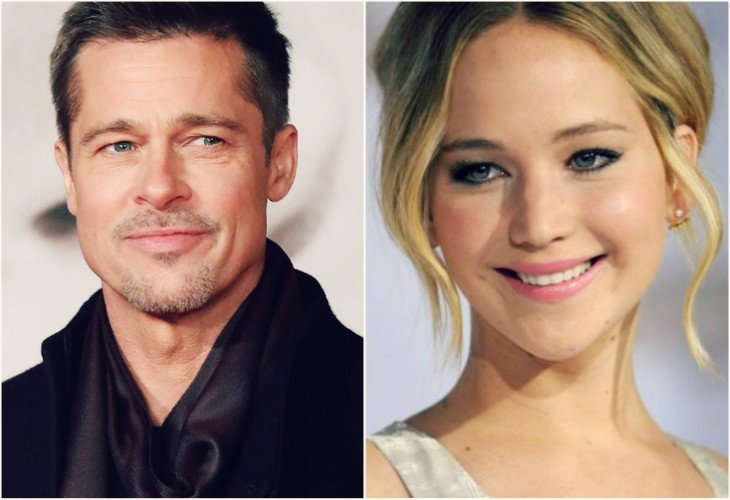

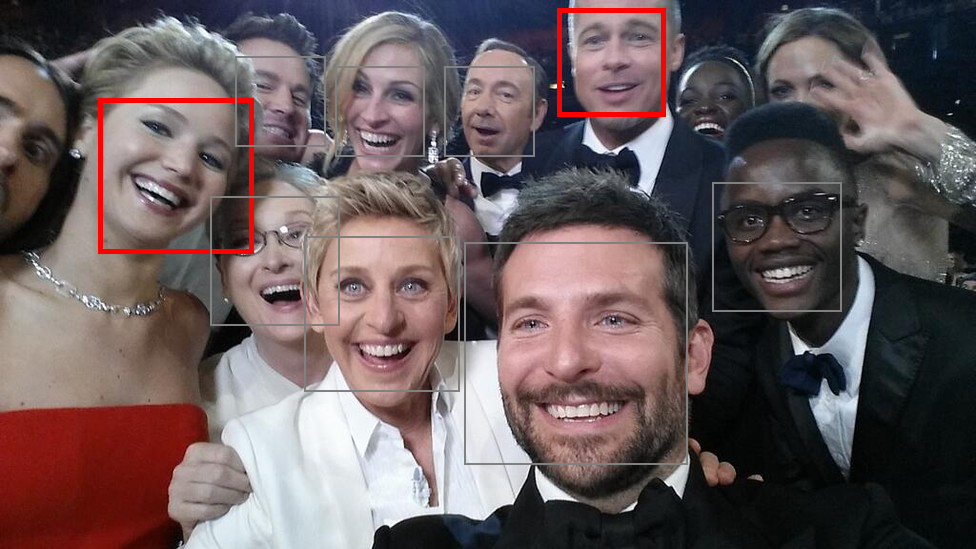

In [1]:
from ml4teens.tools import debug;
debug.disable();

import ml4teens as ml;

context = ml.core.Context.instance;

facercg  = ml.blocks.img.FaceRecognition();
display  = ml.blocks.Display(feed=True);
terminal = ml.blocks.Terminal();

facercg("reference" ) >> display ["image" ];
facercg("image"     ) >> display ["image" ];
facercg("recognized") >> terminal["stdout"];

#reference="https://hips.hearstapps.com/hmg-prod/images/gettyimages-1052566600.jpg?resize=1200:*";
reference="https://www.mundiario.com/asset/thumbnail,1280,720,center,center/media/mundiario/images/2017/12/14/2017121411544546089.jpg";
people   ="https://cdn.theatlantic.com/thumbor/wNhC0SkKB79oHmAhHzjM7vG654c=/0x0:1024x576/976x549/media/img/mt/2014/03/BhxWutnCEAAtEQ6.jpg_large/original.jpg";

context.emit(target=facercg, sname="reference", data=reference, mods={"caption":"Imagen de referencia"});
context.emit(target=facercg, sname="image",     data=people,    mods={"caption":"Imagen de prueba"    });
context.wait();

/home/fran/CODE/ML4Teens/.venv/lib/python3.11/site-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(
Some weights of ViTModel were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized: ['vit.pooler.dense.bias', 'vit.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


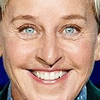

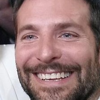

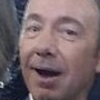

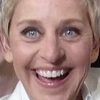

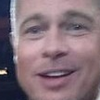

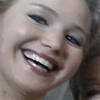

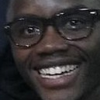

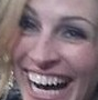

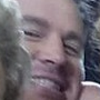

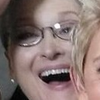

In [5]:
from ml4teens.tools import debug;
debug.disable();

import ml4teens as ml;

context = ml.core.Context.instance.reset();

ref        = ml.blocks.img.ImageSource();
boxing     = ml.blocks.img.FaceBoxing();
crop       = ml.blocks.img.TrimImage();
emb        = ml.blocks.img.Embedding();
#distance   = ml.blocks.img.Distance();
similarity = ml.blocks.img.Similarity();
terminal   = ml.blocks.Terminal();
screen     = ml.blocks.Display();

ref   ("image") >> boxing("image");
ref   ("image") >> crop  ("image");
boxing("box"  ) >> crop  ("box"  );
crop  ("image") >> emb   ("image");

emb   ("embedding") >> similarity("embedding")

crop  ("image") >> screen("image", feed=True, height=100);

reference="https://hips.hearstapps.com/hmg-prod/images/gettyimages-1052566600.jpg?resize=1200:*";
context.emit(target=ref, sname="source", data=reference, mods={"caption":"Imagen de referencia"});
context.wait().reset();

ref   ("image") >> boxing  ("image");
ref   ("image") >> crop    ("image");
boxing("box"  ) >> crop    ("box"  );
boxing("next" ) << terminal("done" );
crop  ("image") >> emb     ("image");

emb   ("embedding") >> similarity("embedding")
similarity("similarity") >> terminal("stdout", done=True);
crop  ("image") >> screen("image",feed=True, height=100);

people   ="https://cdn.theatlantic.com/thumbor/wNhC0SkKB79oHmAhHzjM7vG654c=/0x0:1024x576/976x549/media/img/mt/2014/03/BhxWutnCEAAtEQ6.jpg_large/original.jpg";
context.emit(target=ref, sname="source", data=people, mods={"caption":"Imagen de prueba"});
context.wait();


In [6]:
from ml4teens.tools import debug;
debug.disable();

import ml4teens as ml;

context = ml.core.Context.instance.reset();

timer    = ml.blocks.Timer(times=5, interval=0.5, value='cerdito');
terminal = ml.blocks.Terminal();

timer("event",value="perro") >> terminal["stdout":{"done":True}];
timer["next" ] << terminal("done"  );

context.emit(target=timer, sname="start", data=None, mods={"value":"gato"});
context.wait();


In [7]:
from ml4teens.tools import debug;
debug.disable();

import ml4teens as ml;

context = ml.core.Context.instance.reset();

ifelse   = ml.blocks.IfElse(expression="int(data)>5");
terminal = ml.blocks.Terminal();

ifelse("bool")  >> terminal["stdout"];
ifelse("true")  >> terminal["stdout"];
ifelse("false") >> terminal["stderr"];

context.emit(target=ifelse, sname="event", data="6");
context.wait();
context.emit(target=ifelse, sname="event", data="5");
context.wait();


In [8]:
from ml4teens.tools import debug;
debug.disable();

import ml4teens as ml;

context = ml.core.Context.instance.reset();

ref      = ml.blocks.img.ImageSource();
emb      = ml.blocks.img.Embedding();
terminal = ml.blocks.Terminal();

ref ("image")     >> emb     ("image" );
emb ("embedding") >> terminal("stdout");

reference="https://hips.hearstapps.com/hmg-prod/images/gettyimages-1052566600.jpg?resize=1200:*";

context.emit(target=ref, sname="source", data=reference);
context.wait();


Some weights of ViTModel were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized: ['vit.pooler.dense.bias', 'vit.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [4]:
from ml4teens.tools import debug;
debug.disable();

import ml4teens as ml;

context = ml.core.Context.instance.reset(all=True);

ref      = ml.blocks.img.ImageSource();
emb      = ml.blocks.img.Embedding();
distance = ml.blocks.img.Distance();
terminal = ml.blocks.Terminal();

cat1="https://img.freepik.com/foto-gratis/lindo-gato-persa-chaqueta-rosa-sienta-cafeteria_384344-5416.jpg?w=1380&t=st=1706019656~exp=1706020256~hmac=191e423219b92e5cc8f0a62f18e9000da0de6a544068f2231bfcfb03ebbad5c2";
cat2="https://img.freepik.com/foto-gratis/retrato-gato-pelo-largo-chaqueta-roja_384344-5227.jpg?w=1380&t=st=1706019629~exp=1706020229~hmac=9b36813e93050517fc6b236d2ed5c875e6fdbe477dad0f37aced14c7a103bbeb"
dog ="https://img.freepik.com/foto-gratis/hermoso-retrato-mascota-perro_23-2149218450.jpg?w=1380&t=st=1706019696~exp=1706020296~hmac=29d054c808015145e7ff5b440494fbcf76c7dba2e77efd5cabaf64f5ef8b1cf8";

ref("image") >> emb ("image");
emb ("embedding") >> distance("one");

context.emit(target=ref, sname="source", data=cat1);
context.wait();
context.reset();

ref("image") >> emb ("image");
emb ("embedding") >> distance("two");

distance("distance") >> terminal("stdout",before="Distancia entre imágenes:");

context.emit(target=ref, sname="source", data=cat2);
context.wait();
context.reset(all=True);


Some weights of ViTModel were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized: ['vit.pooler.dense.bias', 'vit.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [9]:
from ml4teens.tools import debug;
debug.disable();

import ml4teens as ml;

context = ml.core.Context.instance.reset(all=True);

ref        = ml.blocks.img.ImageSource();
emb        = ml.blocks.img.Embedding();
similarity = ml.blocks.img.Similarity();
terminal   = ml.blocks.Terminal();

cat1="https://img.freepik.com/foto-gratis/lindo-gato-persa-chaqueta-rosa-sienta-cafeteria_384344-5416.jpg?w=1380&t=st=1706019656~exp=1706020256~hmac=191e423219b92e5cc8f0a62f18e9000da0de6a544068f2231bfcfb03ebbad5c2";
cat2="https://img.freepik.com/foto-gratis/retrato-gato-pelo-largo-chaqueta-roja_384344-5227.jpg?w=1380&t=st=1706019629~exp=1706020229~hmac=9b36813e93050517fc6b236d2ed5c875e6fdbe477dad0f37aced14c7a103bbeb"
dog ="https://img.freepik.com/foto-gratis/hermoso-retrato-mascota-perro_23-2149218450.jpg?w=1380&t=st=1706019696~exp=1706020296~hmac=29d054c808015145e7ff5b440494fbcf76c7dba2e77efd5cabaf64f5ef8b1cf8";

ref("image") >> emb ("image");
emb("embedding") >> similarity("one");

context.emit(target=ref, sname="source", data=cat1);
context.wait();
context.reset();

ref("image") >> emb ("image");
emb("embedding") >> similarity("two");

similarity("similarity") >> terminal("stdout",before="Similitud entre imágenes:");

context.emit(target=ref, sname="source", data=dog);
context.wait();
context.reset(all=True);

Some weights of ViTModel were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized: ['vit.pooler.dense.bias', 'vit.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from ml4teens.tools import debug;
debug.disable();

import ml4teens as ml;

context  = ml.core.Context.instance.reset();

vídeo    = ml.blocks.img.VideoSource(speed=0.5);
facedct  = ml.blocks.img.FaceBoxing();
salida   = ml.blocks.Display(width=320);

vídeo  ("frame") >> facedct("image" );
facedct("image") >> salida ("image", done=True);

vídeo("next")    << salida("done");

source="https://v4.cdnpk.net/videvo_files/video/free/video0457/large_watermarked/_import_60bf208e17ef48.95247691_FPpreview.mp4"
context.emit(target=vídeo,  slot_name="source", data=source);
context.wait();


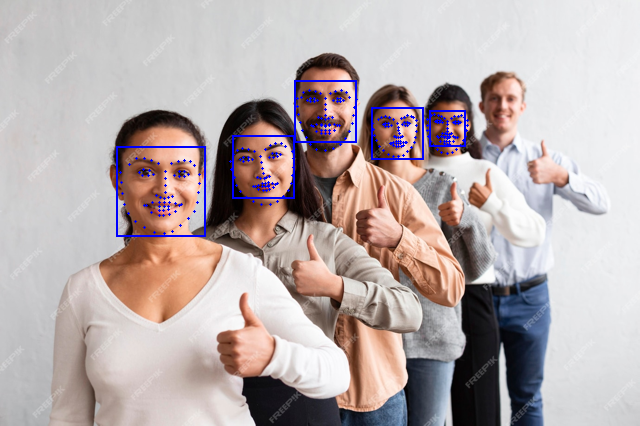

In [3]:
from ml4teens.tools import debug;
debug.disable();

import ml4teens as ml;

context   = ml.core.Context.instance.reset();

imagen   = ml.blocks.img.ImageSource(width=640);
facedctB = ml.blocks.img.FaceBoxing(color="blue", width=2);
facedctL = ml.blocks.img.FaceLandmarks(color="blue", width=2);
salida   = ml.blocks.Display();

imagen  ("image") >> facedctL("image" );
facedctL("image") >> facedctB("image" );
facedctB("image") >> salida  ("image");

source="https://img.freepik.com/foto-gratis/gente-sonriente-dando-pulgar-arriba-sesion-terapia-grupo_23-2148752043.jpg?w=1380&t=st=1704574289~exp=1704574889~hmac=0766e97be83b295a06f324f29f18cbd1f8e59207dd440a2798818f46e548b50e"
context.emit(target=imagen,  sname="source", data=source);
context.wait();


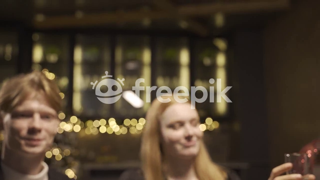

In [4]:
from ml4teens.tools import debug;
debug.disable();

import ml4teens as ml;

context = ml.core.Context.instance.reset();

vídeo    = ml.blocks.img.VideoSource(width=320, speed=0.5);
pantalla = ml.blocks.Display();

#vídeo("frame") >> pantalla["image"];
#vídeo["next" ] << pantalla("done");

(vídeo("frame") >> pantalla["image":{"done":True}])("done") >> vídeo["next"];

context.emit(target=vídeo, sname="source", data="https://v5.cdnpk.net/videvo_files/video/premium/partners0818/large_watermarked/h9699c7ae_V0032_024_FPpreview.mp4");
context.wait();


Some weights of DPTForDepthEstimation were not initialized from the model checkpoint at Intel/dpt-large and are newly initialized: ['neck.fusion_stage.layers.0.residual_layer1.convolution2.bias', 'neck.fusion_stage.layers.0.residual_layer1.convolution1.weight', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.weight', 'neck.fusion_stage.layers.0.residual_layer1.convolution1.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


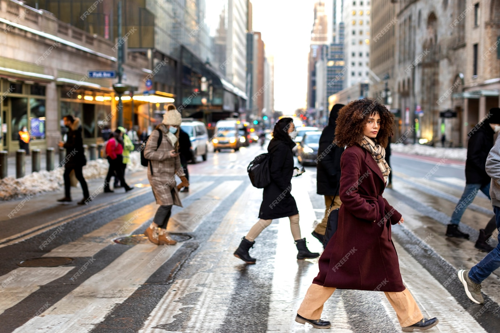

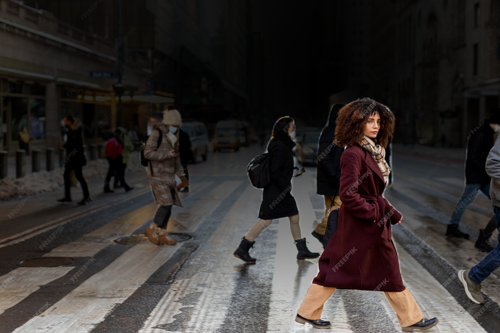

In [5]:
from ml4teens.tools import debug;
debug.disable();

import ml4teens as ml;

context   = ml.core.Context.instance.reset();

imagen   = ml.blocks.img.ImageSource();
split    = ml.blocks.img.SplitChannels();
merge    = ml.blocks.img.MergeChannels();
depth    = ml.blocks.img.DepthEstimation();
opsR     = ml.blocks.img.ImageOp(op="eval", expression="convert((float(r)/255)*l,'L')");
opsG     = ml.blocks.img.ImageOp(op="eval", expression="convert((float(r)/255)*l,'L')");
opsB     = ml.blocks.img.ImageOp(op="eval", expression="convert((float(r)/255)*l,'L')");
salida   = ml.blocks.Display(width=500, feed=True);

imagen("image") >> split ("image");
imagen("image") >> depth ("image");
imagen("image") >> salida("image");

depth ("image") >> opsR ("left");
depth ("image") >> opsG ("left");
depth ("image") >> opsB ("left");

split("red"   ) >> opsR ("right")
split("green" ) >> opsG ("right")
split("blue"  ) >> opsB ("right")

opsR ("image" ) >> merge("red"  )
opsG ("image" ) >> merge("green")
opsB ("image" ) >> merge("blue" )

merge("image") >> salida("image");

#source="https://img.freepik.com/foto-gratis/mujer-tiro-completo-bicicleta-al-aire-libre_23-2149413735.jpg?w=1380&t=st=1704297833~exp=1704298433~hmac=433c68f72fc841cbb094d598521f8b72dad100a383f59b39de5f490cce7c7b99";
source="https://img.freepik.com/foto-gratis/mujer-joven-ciudad-nueva-york-dia_23-2149488509.jpg?w=1380&t=st=1703867123~exp=1703867723~hmac=20196a7ae65904ba1c28259dfc56a7a7419943edb163eee94f92f7dda0ad8307";

context.emit(target=imagen, sname="source", data=source, mods={"sync":True});
context.wait();



/home/fran/CODE/ML4Teens/.venv/lib/python3.11/site-packages/transformers/generation/utils.py:1355: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


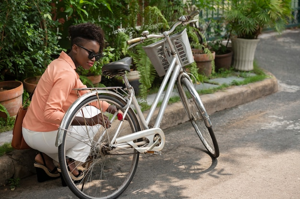

In [6]:
from ml4teens.tools import debug;
debug.disable();

import ml4teens as ml;

context   = ml.core.Context.instance.reset();

imagen   = ml.blocks.img.ImageSource();
img2text = ml.blocks.img.ImageToText(caption="A photo of an");
terminal = ml.blocks.Terminal();
salida   = ml.blocks.Display(width=300);

imagen  ("image") >> img2text("image" );
imagen  ("image") >> salida  ("image" );
img2text("text" ) >> terminal("stdout");

source="https://img.freepik.com/foto-gratis/mujer-tiro-completo-bicicleta-al-aire-libre_23-2149413735.jpg";
#source="https://img.freepik.com/foto-gratis/mujer-joven-ciudad-nueva-york-dia_23-2149488509.jpg?w=1380&t=st=1703867123~exp=1703867723~hmac=20196a7ae65904ba1c28259dfc56a7a7419943edb163eee94f92f7dda0ad8307";

context.emit(target=imagen, sname="source", data=source);
context.wait();


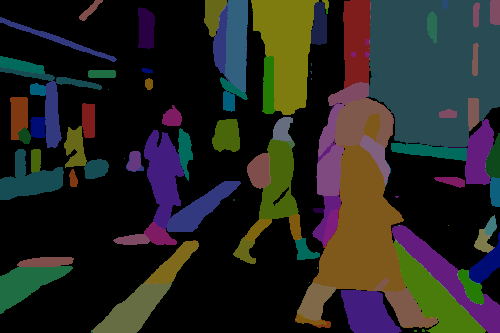

In [ ]:
"""
Hay que trabajar más con SegmentAll, puede dar más de sí.
"""
from ml4teens.tools import debug;
debug.disable();

import ml4teens as ml;

context   = ml.core.Context.instance.reset();

imagen   = ml.blocks.img.ImageSource(width=500);
imgseg   = ml.blocks.img.SegmentAll(model_name="s");
salida   = ml.blocks.Display();

imagen("image") >> imgseg("image");
imgseg("mask" ) >> salida("image");

source="https://img.freepik.com/foto-gratis/mujer-joven-ciudad-nueva-york-dia_23-2149488509.jpg?w=1380&t=st=1703867123~exp=1703867723~hmac=20196a7ae65904ba1c28259dfc56a7a7419943edb163eee94f92f7dda0ad8307";

context.emit(target=imagen, sname="source", data=source);
context.wait();


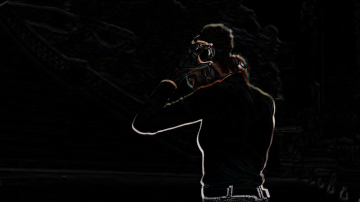

In [7]:
import ml4teens as ml;

context   = ml.core.Context.instance.reset();

vídeo    = ml.blocks.img.VideoSource(width=360);
op       = ml.blocks.img.ImageOp(op="diff seq");
salida   = ml.blocks.Display();

vídeo ("frame") >> op    ("image");
op    ("image") >> salida("image", done=True);

vídeo ("next" ) << salida("done" );

#source="https://v4.cdnpk.net/videvo_files/video/free/video0482/large_watermarked/_import_62bbefe51f3547.77164811_FPpreview.mp4";
source="https://v4.cdnpk.net/videvo_files/video/free/video0460/large_watermarked/_import_60cc3022971d79.05815712_FPpreview.mp4";

context.emit(target=vídeo, sname="source", data=source);
context.wait();


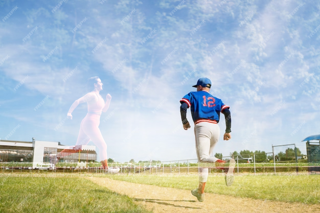

In [8]:
from ml4teens.tools import debug;
debug.disable();

import ml4teens as ml;

context   = ml.core.Context.instance.reset();

image_left  = ml.blocks.img.ImageSource();
image_right = ml.blocks.img.ImageSource();
op          = ml.blocks.img.ImageOp(op="screen");
salida      = ml.blocks.Display();

image_left ("image") >> op    ("left" );
image_right("image") >> op    ("right");
op         ("image") >> salida("image", width=320);

source_left  = "https://img.freepik.com/foto-gratis/mujer-tiro-completo-corriendo-al-aire-libre_23-2149622958.jpg?w=1380&t=st=1704273288~exp=1704273888~hmac=7b34946ecff9d06c9fef1f159d2bdb54361e355eb7c34648b1b153b0cb4a84f7";
source_right = "https://img.freepik.com/foto-gratis/nino-vista-lateral-corriendo-campo_23-2149457304.jpg?t=st=1704273288~exp=1704273888~hmac=7e375feb2153c63c38aed1e5a4bd467c2210a61c6500f14e806299094f57e0dc";

context.emit(target=image_left,  sname="source", data=source_left);
context.emit(target=image_right, sname="source", data=source_right);
context.wait();



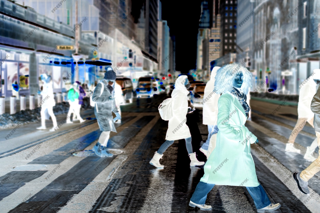

In [9]:
from ml4teens.tools import debug;
debug.disable();

import sys, traceback;

import ml4teens as ml;

context   = ml.core.Context.instance.reset();

imagen   = ml.blocks.img.ImageSource();
op       = ml.blocks.img.ImageOp(op="invert");
salida   = ml.blocks.Display(width=320);

imagen("image") >> op    ("image");
op    ("image") >> salida("image");

source = "https://img.freepik.com/foto-gratis/mujer-joven-ciudad-nueva-york-dia_23-2149488509.jpg?w=1380&t=st=1703867123~exp=1703867723~hmac=20196a7ae65904ba1c28259dfc56a7a7419943edb163eee94f92f7dda0ad8307";

context.emit(target=imagen,  sname="source", data=source);
context.wait();


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 83.7M/83.7M [00:02<00:00, 41.4MB/s]


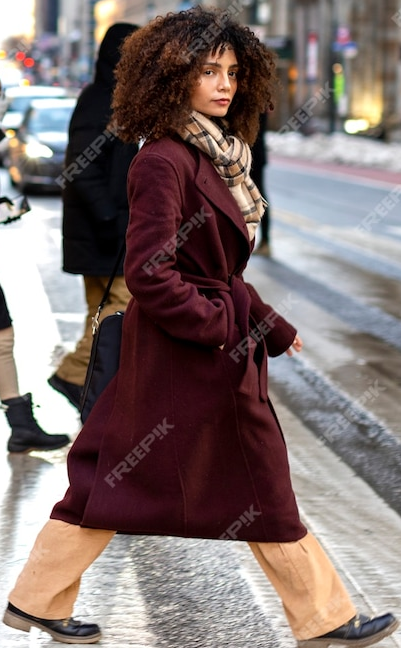

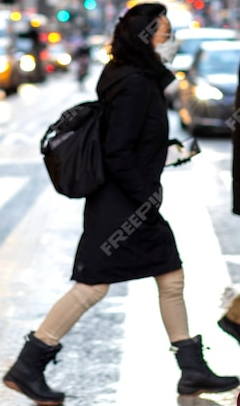

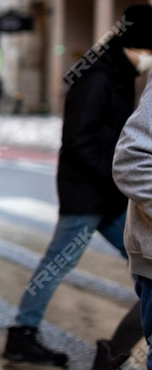

In [10]:
from ml4teens.tools import debug;
debug.disable();

import ml4teens as ml;

context = ml.core.Context.instance;
context.reset();
context.sync=False;

imagen   = ml.blocks.img.ImageSource();
objid    = ml.blocks.img.ObjectID(model_name="l", n=3);
trim     = ml.blocks.img.TrimImage(); #conf=0.85, classes=[0]);
salida   = ml.blocks.Display(feed=True);

imagen("image") >> objid ("image");
imagen("image") >> trim  ("image");
objid ("boxes") >> trim  ("boxes");
trim  ("image") >> salida("image");

source="https://img.freepik.com/foto-gratis/mujer-joven-ciudad-nueva-york-dia_23-2149488509.jpg?w=1380&t=st=1703867123~exp=1703867723~hmac=20196a7ae65904ba1c28259dfc56a7a7419943edb163eee94f92f7dda0ad8307"

context.emit(target=imagen,  sname="source", data=source);
context.wait();


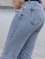

In [11]:
import ml4teens as ml;

context = ml.core.Context.instance.reset();

vídeo    = ml.blocks.img.VideoSource(speed=1, width=320);
objid    = ml.blocks.img.ObjectID(model_name="xs", conf=0.80);
trim    = ml.blocks.img.TrimImage(n=1);
salida   = ml.blocks.Display(feed=False);

vídeo ("frame") >> objid ("image");
vídeo ("frame") >> trim ("image");
objid ("boxes") >> trim ("boxes");
trim ("image") >> salida("image", done=True);

salida("done" ) >> vídeo ("next");

#source="https://v4.cdnpk.net/videvo_files/video/free/video0460/large_watermarked/_import_60cc2f69bd3275.18895086_FPpreview.mp4";
source="https://v4.cdnpk.net/videvo_files/video/free/video0460/large_watermarked/_import_60cc3022971d79.05815712_FPpreview.mp4";

context.emit(target=vídeo, sname="source", data=source);
context.wait();


## Vídeo al que se le ajusta el tamaño según el tamaño de una imagen exterior.

La siguiente celda muestra cómo podemos tener más de un punto de inicio.

**Observar**: se ejecutan (context.emit) varios bloques, primero 'imagen' (que establece el shape que ha de tener el vídeo) y luego 'vídeo'.

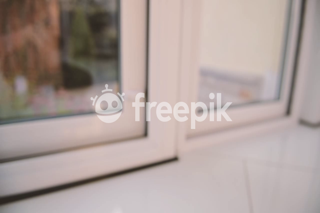

In [12]:
from ml4teens.tools import debug;
debug.disable();

import ml4teens as ml;

context   = ml.core.Context.instance.reset();

imagen   = ml.blocks.img.ImageSource(width=320);
vídeo    = ml.blocks.img.VideoSource(speed=0.5);
resize   = ml.blocks.img.ResizeImage();
salida   = ml.blocks.Display(feed=False);

imagen("image") >> resize("shape");
vídeo ("frame") >> resize("image");
resize("image") >> salida("image", done=True);
#imagen("image") >> salida("image");

salida("done" ) >> vídeo ("next");

source_imagen = "https://img.freepik.com/foto-gratis/mujer-joven-ciudad-nueva-york-dia_23-2149488509.jpg?w=1380&t=st=1703867123~exp=1703867723~hmac=20196a7ae65904ba1c28259dfc56a7a7419943edb163eee94f92f7dda0ad8307";
source_vídeo  = "https://v5.cdnpk.net/videvo_files/video/premium/partners0817/large_watermarked/h8caae9f6_V0027_049_B_FPpreview.mp4";

context.emit(target=imagen, sname="source", data=source_imagen);
context.emit(target=vídeo,  sname="source", data=source_vídeo);
context.wait();



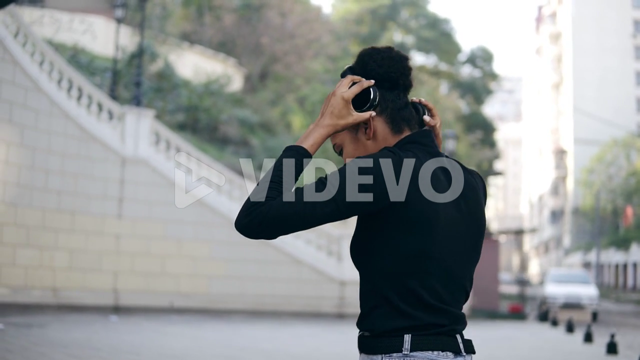

In [4]:
import ml4teens as ml;

context   = ml.core.Context.instance.reset();

vídeo    = ml.blocks.img.VideoSource(width=640, speed=1);
resize   = ml.blocks.img.ResizeImage();
salida   = ml.blocks.Display();

vídeo ("frame") >> resize("image");
resize("image") >> salida("image", done=True);

salida("done" ) >> vídeo ("next");

source="https://player.vimeo.com/external/371564393.sd.mp4?s=33b5f1326e4b6dbad0b65ef289fd08ee3835ecbc&profile_id=164&oauth2_token_id=57447761";

context.emit(target=vídeo,  sname="source", data=source);
context.wait();


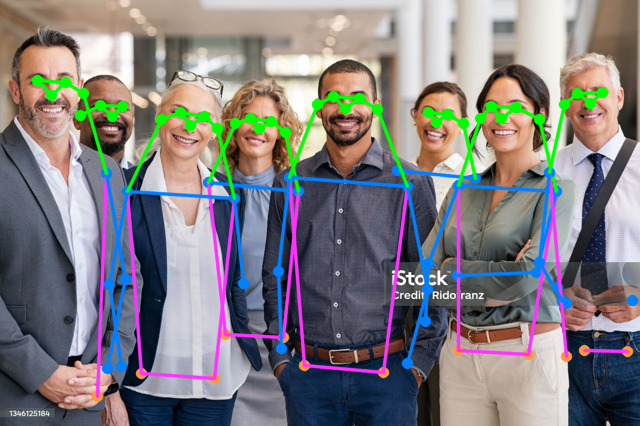

In [2]:
import ml4teens as ml;

context   = ml.core.Context.instance.reset();

imagen   = ml.blocks.img.ImageSource(width=640);
pose     = ml.blocks.img.PoseEstimation();
salida   = ml.blocks.Display();
terminal = ml.blocks.Terminal();

imagen("image") >> pose("image");
pose("image") >> salida("image");
pose("boxes") >> terminal("stdout");

source="https://media.istockphoto.com/id/1346125184/es/foto/grupo-de-exitoso-equipo-empresarial-multi%C3%A9tnico.jpg?s=2048x2048&w=is&k=20&c=ALjoVs9tTs3MM0zpSgfRBA17yW3U7HFJ5krzG7us30Y=";

context.emit(target=imagen,  slot_name="source", data=source);
context.wait();


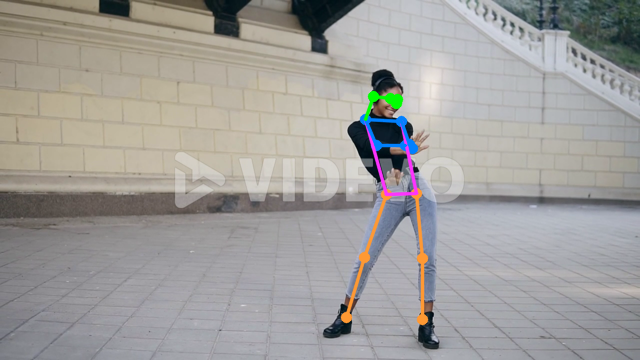

In [ ]:
import ml4teens as ml;

context   = ml.core.Context.instance.reset();

vídeo  = ml.blocks.img.VideoSource(width=640, speed=1);
pose   = ml.blocks.img.PoseEstimation();
salida = ml.blocks.Display();

vídeo ("frame") >> pose("image");
pose("image") >> salida("image", done=True);

salida("done" ) >> vídeo ("next");

#source="https://player.vimeo.com/external/371564393.sd.mp4?s=33b5f1326e4b6dbad0b65ef289fd08ee3835ecbc&profile_id=164&oauth2_token_id=57447761";
source="https://v4.cdnpk.net/videvo_files/video/free/video0460/large_watermarked/_import_60cc3022971d79.05815712_FPpreview.mp4";

context.emit(target=vídeo,  sname="source", data=source);
context.wait();


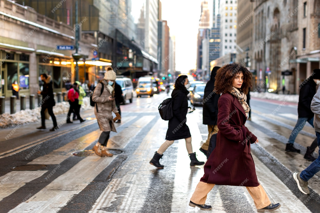

In [14]:
import ml4teens as ml;

context   = ml.core.Context.instance.reset();
context.sync=False;

imagen   = ml.blocks.img.ImageSource();
split    = ml.blocks.img.SplitChannels();
merge    = ml.blocks.img.MergeChannels();
salida   = ml.blocks.Display(width=320, feed=True);

imagen("image") >> split ("image");
split ("red"  ) >> merge ("red"  );
split ("green") >> merge ("green");
split ("blue" ) >> merge ("blue" );
merge ("image") >> salida("image");

source="https://img.freepik.com/foto-gratis/mujer-joven-ciudad-nueva-york-dia_23-2149488509.jpg?w=1380&t=st=1703867123~exp=1703867723~hmac=20196a7ae65904ba1c28259dfc56a7a7419943edb163eee94f92f7dda0ad8307"

context.emit(target=imagen,  sname="source", data=source);
context.wait();


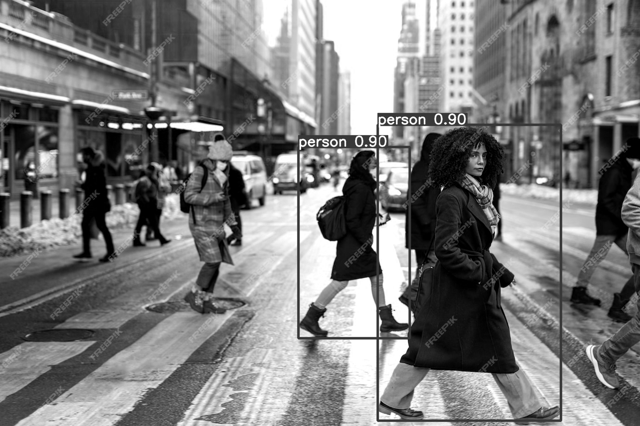

In [15]:
from ml4teens.tools import debug;
debug.disable();

import ml4teens as ml;

context   = ml.core.Context.instance.reset();

imagen   = ml.blocks.img.ImageSource();
objid    = ml.blocks.img.ObjectID(model_name="xs", conf=0.89);
grey     = ml.blocks.img.SingleChannel(channel=2);
salida   = ml.blocks.Display(width=640);
terminal = ml.blocks.Terminal();

((imagen("image") >> objid("image"))("image") >> grey("image"))("image") >> salida("image");

objid("boxes") >> terminal("stdout");

source="https://img.freepik.com/foto-gratis/mujer-joven-ciudad-nueva-york-dia_23-2149488509.jpg?w=1380&t=st=1703867123~exp=1703867723~hmac=20196a7ae65904ba1c28259dfc56a7a7419943edb163eee94f92f7dda0ad8307";

context.emit(target=imagen,  sname="source", data=source);
context.wait();



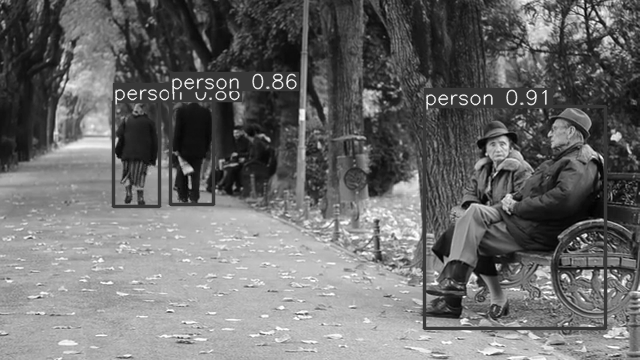

In [16]:
from ml4teens.tools import debug;
debug.disable();

import ml4teens as ml;

context   = ml.core.Context.instance.reset();

vídeo    = ml.blocks.img.VideoSource();
grey     = ml.blocks.img.SingleChannel(channel=1);
objid    = ml.blocks.img.ObjectID(model_name="xs", conf=0.60);
salida   = ml.blocks.Display(width=640);

((vídeo("frame") >> objid["image"])("image") >> grey["image"])("image") >> salida["image":{"done":True}];

salida("done") >> vídeo ["next"];

source="https://cdn.pixabay.com/vimeo/188704568/parque-6096.mp4?width=640&hash=112e5fd94cb9090c07f4472a41d182d344db647b";

context.emit(target=vídeo,  sname="source", data=source);
context.wait();


**Nueva forma de ejecutar un bloque.**

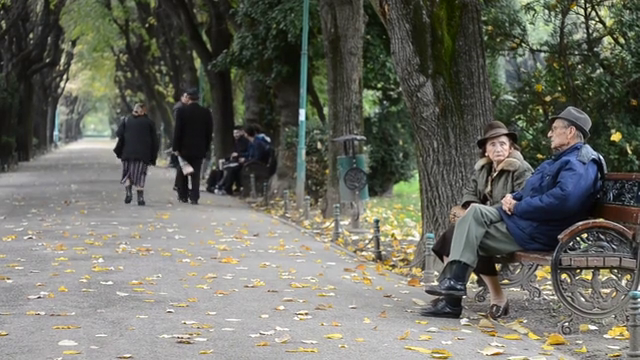

In [1]:
from ml4teens.tools import debug;
debug.disable();

import ml4teens as ml;

context   = ml.core.Context.instance.reset();

vídeo    = ml.blocks.img.VideoSource();
salida   = ml.blocks.Display();

vídeo ("frame") >= salida["image":{"done":True}]; # ejecución directa de la señal!
vídeo ["next" ] <<  salida("done" );

source="https://cdn.pixabay.com/vimeo/188704568/parque-6096.mp4?width=640&hash=112e5fd94cb9090c07f4472a41d182d344db647b"

context.emit(target=vídeo, sname="source", data=source);

context.wait();
